#Importing Libraries

In [89]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score


In [90]:
#Miscellanous libraries
from collections import Counter

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
data = pd.read_csv('/content/drive/MyDrive/ start/7004OTT Content Reviews - 7004OTT Content Reviews.csv', encoding='UTF-8')
data

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


In [93]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Label ==1]),
      "\nTotal Negative Reviews:",len(data[data.Label==2]),
      "\nTotal Neutral Reviews:",len(data[data.Label ==0]))


Total Reviews: 7003 
Total Positive Reviews: 3662 
Total Negative Reviews: 2261 
Total Neutral Reviews: 1080


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


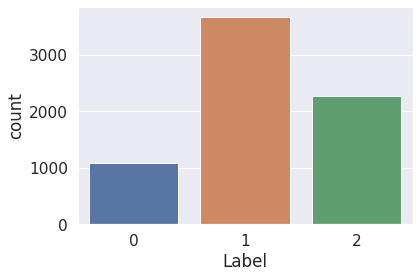

In [94]:
sns.countplot(data['Label'])

In [95]:
data.drop_duplicates(inplace=True)
data

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2
6999,বৌদি কে লাগাবে,2
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0
7001,কাহিনীর গল্প খুব বাজে,2


In [96]:
#data.dropna(inplace=True)

In [97]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Label ==1]),
      "\nTotal Negative Reviews:",len(data[data.Label==2]),
      "\nTotal Neutral Reviews:",len(data[data.Label ==0]))


Total Reviews: 6618 
Total Positive Reviews: 3409 
Total Negative Reviews: 2171 
Total Neutral Reviews: 1038


In [98]:
data.columns

Index(['Text', 'Label'], dtype='object')

**Some unprocessed reviews**

In [99]:
# print some unprocessed reviews
sample_data = [5,110,169,208,209,307,123,221,229,230,231,2750,6211,6257,6345,7000]
for i in sample_data:
      print(data.Text[i],'\n','Sentiment:-- ',data.Label[i],'\n')

এই গল্পে প্রচুর থ্রিল থাকবে কি হবে কি হবে এটা বুঝতেই পারবে না কেউ।।আগুন একটা কাজ হবে এই সিন্ডিকেট এ️️love u guru 
 Sentiment:--  1 

শেষের মুহূর্তটা পূর্ণ জন্ম মত 
 Sentiment:--  1 

মনে হচ্ছে একটা মাস্টারপিস মাস্ট ওয়াচ হতে যাচ্ছে... 
 Sentiment:--  1 

পাট ২ জন্য পাগল হয়ে গেছি 
 Sentiment:--  1 

ভাই ভালোর জন্য বলছি নিজের চ্যানেল টা যদি টিকিয়ে রাখতে চান তাহলে ভিডিও টা ডিলেট করে দিন 
 Sentiment:--  0 

কম বেশি সব ভালো ভালো অভিনয় শিল্পী। অবশ্যই দেখবো। সকল টিম মেম্বারদের জন্য শুভকামনা রইল। 
 Sentiment:--  1 

সত্যিই প্রচন্ড বিরক্তিকর ছিল শেষটা এমন এক জায়গায়ে শেষ কিন্তু, অসাধারণ ছিলো বলতে হবে আর আমি অপেক্ষা আছি পার্ট 2 এর জন্য 
 Sentiment:--  1 

বাংলাদেশের ছবিতে গুলো অসাধারণ। প্রশংসা করার ভাষা থেকে না এতটাই সুন্দর হয়। এরকম আরো অনেক ভালো ভালো ছবিতে উপহার পেলে খুব খুশি হব। 
 Sentiment:--  1 

তাকদীর এর পর আবার একটা ভালো thriller। ভালোবাসা নেবেন কলকাতা থেকে। 
 Sentiment:--  1 

দুই টা জিনিস কারো জন্য অপেক্ষা করেনা। একটা সময় আরেক টা টাকা।" 
 Sentiment:--  0 

স্যালুট মোশাররফ করিম। আপনি জীব

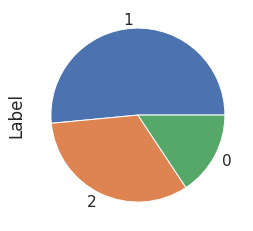

In [100]:
data['Label'].value_counts().plot(kind='pie')
plt.show()

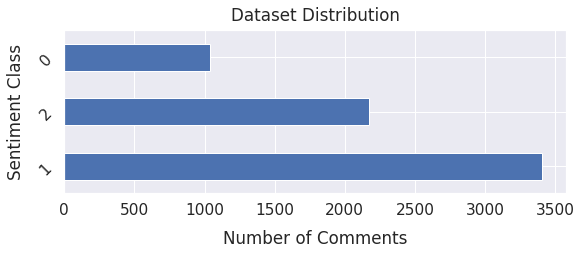

In [101]:
sns.set(font_scale=1.4)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [102]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Data Cleaning**

In [103]:
!pip install bangla-stemmer
#importing stemmer
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from bangla_stemmer.stemmer import stemmer
import re
btokenizer = BasicTokenizer()

def clean_text(text):
    text = re.sub('[^\u0980-\u09FF]',' ',str(text))
    tokens = btokenizer.tokenize(text)
    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(tokens)
    filtered = []
    for i in stm:
      
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
       
        filtered.append(i)
    
    return " ".join(filtered)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Apply The Function in to the Dataframe**

In [104]:
# Apply the function into the dataframe
data['cleaned'] = data['Text'].apply(clean_text)  

# print some cleaned reviews from the dataset
sample_data = [120,220,330,456,548,779,879,99,1001,2005]
for i in sample_data:
     print('Original:\n',data.Text[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Label[i],'\n')

Streaming output truncated to the last 5000 lines.
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
app

**After Preprocessing**

In [105]:
data

,Text,Label,cleaned
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1,পুরা অস্থির সাকিল চট্টগ্রাম
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ওন কান্না আস
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1,পুরা আগুন অপেক্ষায় আছি টা দেখ
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1,ইন্টারেস্টিং স্টোরি অভিনয় সিনেমেটোগ্রাফি জোস
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1,এট লিস্ট অনন্ত জলীল ১০০ টাকা মুভির ট্রেইল থেক ...
...,...,...,...
6998,প্রথমে মিষ্টি এরপর পরকিয়া,2,প্রথমে মিষ্ এরপর পরকিয়া
6999,বৌদি কে লাগাবে,2,বৌদি লাগাবে
7000,এই সিরিজ টা পুরো কোথায় পাওয়া যাবে,0,সিরিজ টা পুরো কোথায় পাওয়া
7001,কাহিনীর গল্প খুব বাজে,2,কাহিনীর গল্প বাজে


**Remove Low length data**


In [106]:
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))

# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = data.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 6618


In [107]:
dataset=dataset[['cleaned','Label']]
dataset.head()

,cleaned,Label
0,পুরা অস্থির সাকিল চট্টগ্রাম,1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ওন কান্না আস,1
2,পুরা আগুন অপেক্ষায় আছি টা দেখ,1
3,ইন্টারেস্টিং স্টোরি অভিনয় সিনেমেটোগ্রাফি জোস,1
4,এট লিস্ট অনন্ত জলীল ১০০ টাকা মুভির ট্রেইল থেক ...,1



**The summary of the reviews and words distribution in the dataset**

In [108]:
#Dataset Summary

def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(dataset[dataset.Label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].cleaned)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  1
Number of Documents:3409
Number of Words:26770
Number of Unique Words:5175
Most Frequent Words:

গান	732
ভালো	648
এক	593
অসাধারণ	527
সুন্দর	372
কর	333
অভিনয়	299
নাটক	284
আম	283
টা	271

Class Name :  2
Number of Documents:2171
Number of Words:18379
Number of Unique Words:5315
Most Frequent Words:

কর	397
ভালো	253
এক	243
নাটক	161
দাখ	127
দেখ	127
এসব	123
সিরিজ	122
আম	119
থেক	119

Class Name :  0
Number of Documents:1038
Number of Words:6340
Number of Unique Words:2255
Most Frequent Words:

কর	118
টা	91
দেখ	89
মুভি	83
আম	71
ভাই	68
এক	66
থেক	55
নাটক	54
চাই	54
Total Number of Unique Words:9377


**Dataset Summary Visualization**

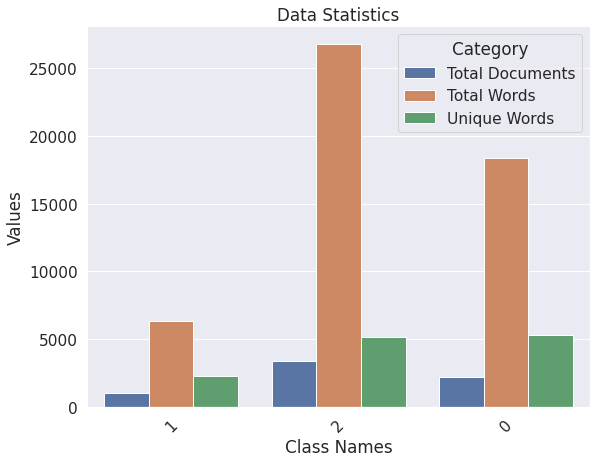

In [109]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(9,7))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

**Text Length Distribution**

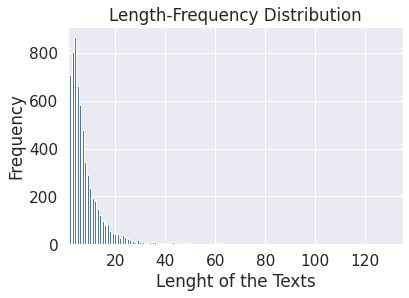

Maximum Length of a review: 156
Minimum Length of a review: 0
Average Length of a reviews: 8.0


In [110]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

**Using over-sampling to balance the dataset**

In [111]:
pcomment = dataset[dataset.Label == 1][:3409]
pcomment


,cleaned,Label,ReviewLength
0,পুরা অস্থির সাকিল চট্টগ্রাম,1,4
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ওন কান্না আস,1,9
2,পুরা আগুন অপেক্ষায় আছি টা দেখ,1,6
3,ইন্টারেস্টিং স্টোরি অভিনয় সিনেমেটোগ্রাফি জোস,1,5
4,এট লিস্ট অনন্ত জলীল ১০০ টাকা মুভির ট্রেইল থেক ...,1,13
...,...,...,...
6471,দিক গুলো মন্দ ঢুকছেনা টা প্রথমে মাথায় ঢুক গেছ ...,1,29
6472,নাম দাখ ভেবেছি ভিউস কলক মানুষ রোমান্টিক দেখবেন...,1,11
6593,পাপ হইচই বেস্ট সিরিজ,1,4
6604,আম ২০২১ টা বেস্ট বছর অ্যাডিয়েন্স সেরার সেরাটা...,1,14


In [112]:
ncomment = dataset[dataset.Label == 2]
ncomment


,cleaned,Label,ReviewLength
31,টাক কপি পেস্ট চালায় দিল ক্রেডিট দিল,2,7
35,জাহান্নামী,2,1
39,ধীরগতির দাখ মজা পাই সময় নষ্ট হই,2,7
47,বাংলা সিনেম কথা লাভ,2,4
54,চাল একুরিয়ামে মাছ আছ আপাতত মাছ সিয়াম রান্না দাও,2,9
...,...,...,...
6612,সিনেমা বাস্তব আলাদা গুলো দেখলে বোজা,2,6
6613,প্রথমে মিষ্ এরপর পরকিয়া,2,4
6614,বৌদি লাগাবে,2,2
6616,কাহিনীর গল্প বাজে,2,3


In [113]:
nuecomment = dataset[dataset.Label == 0]
nuecomment


,cleaned,Label,ReviewLength
10,আগুন লাগা দিলো এক ঝলকে,0,5
15,বাংলাদেশ কিছুর আশা,0,3
24,অতি শ্রীগ্র শ্রীগ্র নিশো ভাই সিনেমায় দেখবো,0,7
26,আফরান নিশো বস শখ চুল কাট ফেলেছিল অপেক্ষ,0,8
29,আসবে,0,1
...,...,...,...
6605,গর্বিত বাঙালী বিশ্ব হৃদয় ছুত,0,5
6607,মুভি গুলো বোঝায় বাংলা ফিল্ম ইন্ডাস্ট্রি এক দি...,0,9
6608,বিয় থাক বিয় মাছ ব্যাং যায়,0,6
6611,মেয়ে জীবন টা বড় অদ্ভুত ছোট থেক বাবা মা কোলে ...,0,50


In [114]:
dataset = pd.concat([pcomment,ncomment,nuecomment], axis = 0)


**Feature Extraction Using TF-IDF**

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
X = tfidf1.fit_transform(dataset['cleaned'])
y=dataset['Label'].values
print("Shape of TF-IDF:",X.shape,'\n')


Shape of TF-IDF: (6618, 79746) 



**Feature Extraction Using Count Vectorizer**

In [116]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(ngram_range=(1,3),tokenizer=lambda x: x.split())
# X=vectorizer.fit_transform(data['Text'])
# y=data['Label'].values
# print("Shape of TF-IDF:",X.shape,'\n')


**Oversampling**

In [117]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [118]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [119]:
X.shape

(10227, 79746)

In [120]:
y

array([1, 1, 1, ..., 2, 2, 2])

Class=1, n=3409 (33.333%)
Class=2, n=3409 (33.333%)
Class=0, n=3409 (33.333%)


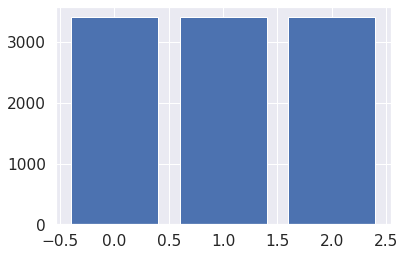

In [121]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**sample for tf-idf**

In [122]:
review='পুরাই অস্থির সাকিল চট্টগ্রাম	'
print("Sample Review: ",review)
vector = tfidf1.transform([review])
df = pd.DataFrame(vector.T.todense(), index=tfidf1.get_feature_names(), columns=["tfidf"])
a = df.sort_values(by=["tfidf"],ascending=False)
print(a[0:len(review.split())])

Sample Review:  পুরাই অস্থির সাকিল চট্টগ্রাম	
                           tfidf
অস্থির সাকিল            0.459164
অস্থির সাকিল চট্টগ্রাম  0.459164
সাকিল চট্টগ্রাম         0.412953
সাকিল                   0.403758


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**sample for count vec**

In [123]:
# review='পুরাই অস্থির সাকিল চট্টগ্রাম	'
# print("Sample Review: ",review)
# vector = vectorizer.transform([review])
# df = pd.DataFrame(vector.T.todense(), index=vectorizer.get_feature_names(), columns=["count"])
# a = df.sort_values(by=["count"],ascending=False)
# print(a[0:len(review.split())])

**Splitting Dataset**

In [124]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.80, test_size = 0.20,random_state =100)
print('Shape of X_train:', xtrain.shape)
print('Shape of X_test:', xtest.shape)
print('Shape of Y_train:', ytrain.shape)
print('Shape of Y_test:', ytest.shape)

Shape of X_train: (8181, 79746)
Shape of X_test: (2046, 79746)
Shape of Y_train: (8181,)
Shape of Y_test: (2046,)


**Logistic Regression (Model Create,Classification Report,Confusion Matrix,Roc Curve)**

In [125]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
predicted_LR = lr.predict(xtest)
l=accuracy_score(ytest,predicted_LR)
print(l)

0.8641251221896383


In [126]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_LR))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       694
           1       0.90      0.76      0.83       680
           2       0.83      0.90      0.86       672

    accuracy                           0.86      2046
   macro avg       0.87      0.86      0.86      2046
weighted avg       0.87      0.86      0.86      2046



In [127]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a=precision_score(ytest, predicted_LR,average='micro')
b=recall_score(ytest, predicted_LR,average='micro')
c=f1_score(ytest, predicted_LR,average='micro')
print("Precision_score",a)
print("Recall_score",b)
print("F1_score",c)

Precision_score 0.8641251221896383
Recall_score 0.8641251221896383
F1_score 0.8641251221896383


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


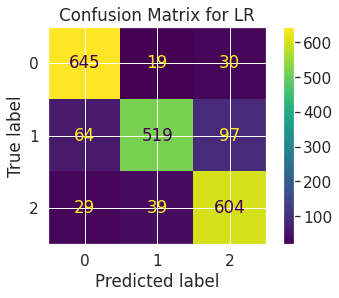

In [128]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,xtest,ytest)
plt.title("Confusion Matrix for LR")
plt.savefig("CM_LR")
plt.show()

In [129]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_LR_pr = lr.predict_proba(xtest)
auc1 = metrics.roc_auc_score(ytest,predicted_LR_pr,multi_class="ovo", average="macro" )
auc1

0.9603693674876291

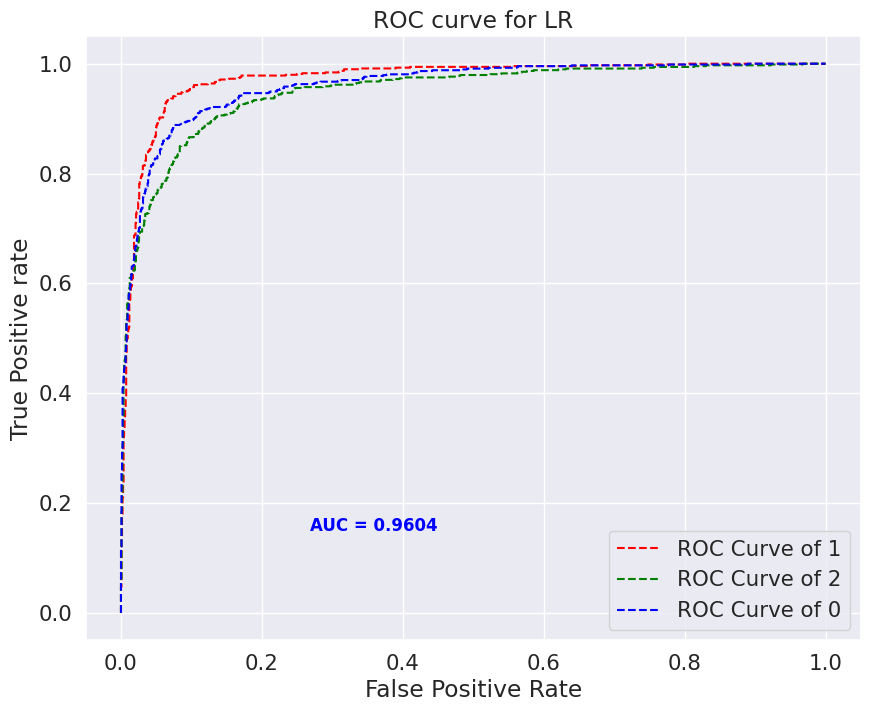

In [130]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_LR_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='ROC Curve of 1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of 2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of 0')
plt.title('ROC curve for LR')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc1, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_LR")
plt.legend(loc='best')

In [131]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
lr.predict(tf_comment)


array([1, 2, 0])

**Multinomial Nave Bayes (Model Create,Classification Report,Confusion Matrix,Roc Curve)**

In [132]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
predicted_NB = mnb.predict(xtest)
n=accuracy_score(ytest,predicted_NB)
print(n)


0.8778103616813294


In [133]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_NB))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       694
           1       0.87      0.84      0.85       680
           2       0.89      0.86      0.88       672

    accuracy                           0.88      2046
   macro avg       0.88      0.88      0.88      2046
weighted avg       0.88      0.88      0.88      2046



In [134]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a1=precision_score(ytest, predicted_NB,average='micro')
b1=recall_score(ytest, predicted_NB,average='micro')
c1=f1_score(ytest, predicted_NB,average='micro')
print("Precision_score",a1)
print("Recall_score",b1)
print("F1_score",c1)

Precision_score 0.8778103616813294
Recall_score 0.8778103616813294
F1_score 0.8778103616813294


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


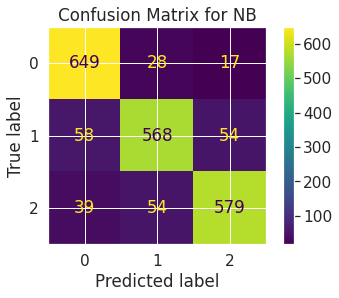

In [135]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnb,xtest,ytest)
plt.title("Confusion Matrix for NB")
plt.savefig("CM_NB")
plt.show()

In [136]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_NB_pr = mnb.predict_proba(xtest)
auc2 = metrics.roc_auc_score(ytest,predicted_NB_pr,multi_class="ovo", average="macro" )
auc2

0.9658996305955139

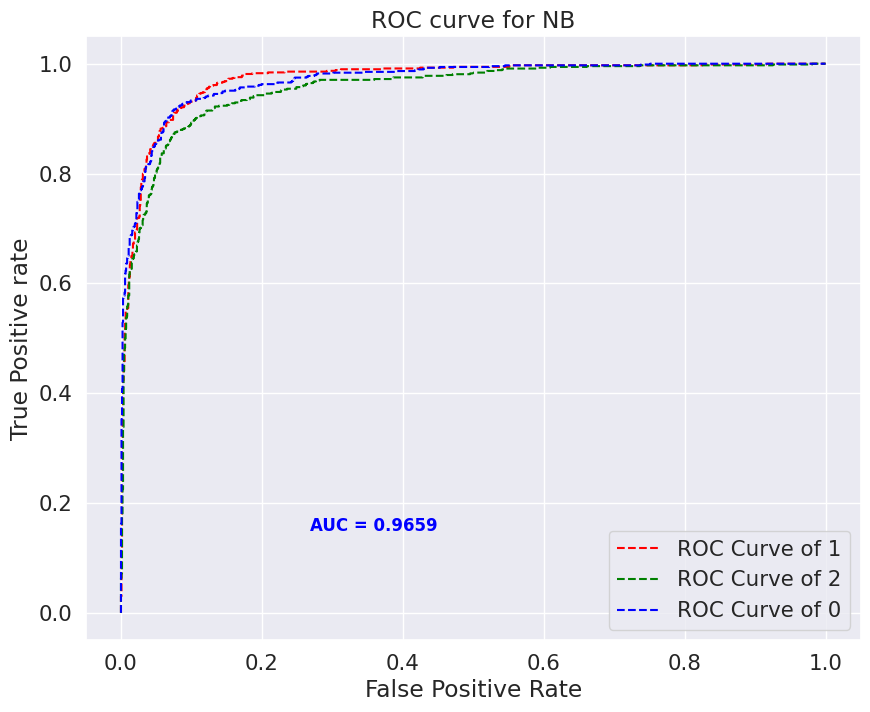

In [137]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_NB_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='ROC Curve of 1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of 2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of 0')
plt.title('ROC curve for NB')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc2, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_NB")
plt.legend(loc='best')

In [138]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
mnb.predict(tf_comment)


array([1, 2, 0])

**K Nearest-Neighbours (Model Create,Classification Report,Confusion Matrix,Roc Curve)**

In [139]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski')
knn.fit(xtrain,ytrain)
predicted_KNN = knn.predict(xtest)
k=accuracy_score(ytest,predicted_KNN)
print(k)

0.6021505376344086


In [140]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_KNN))

              precision    recall  f1-score   support

           0       0.49      0.98      0.65       694
           1       0.89      0.15      0.25       680
           2       0.83      0.68      0.74       672

    accuracy                           0.60      2046
   macro avg       0.74      0.60      0.55      2046
weighted avg       0.73      0.60      0.55      2046



In [141]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a2=precision_score(ytest, predicted_KNN,average='micro')
b2=recall_score(ytest, predicted_KNN,average='micro')
c2=f1_score(ytest, predicted_KNN,average='micro')
print("Precision_score",a2)
print("Recall_score",b2)
print("F1_score",c2)

Precision_score 0.6021505376344086
Recall_score 0.6021505376344086
F1_score 0.6021505376344086


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


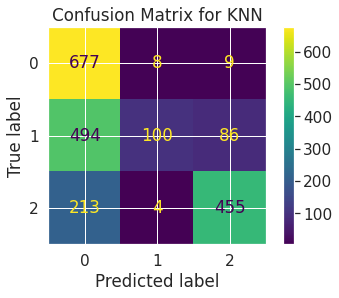

In [142]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,xtest,ytest)
plt.title("Confusion Matrix for KNN")
plt.savefig("CM_KNN")
plt.show()

In [143]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_KNN_pr = knn.predict_proba(xtest)
auc3 = metrics.roc_auc_score(ytest,predicted_KNN_pr,multi_class="ovo", average="macro" )
auc3

0.6999116199073289

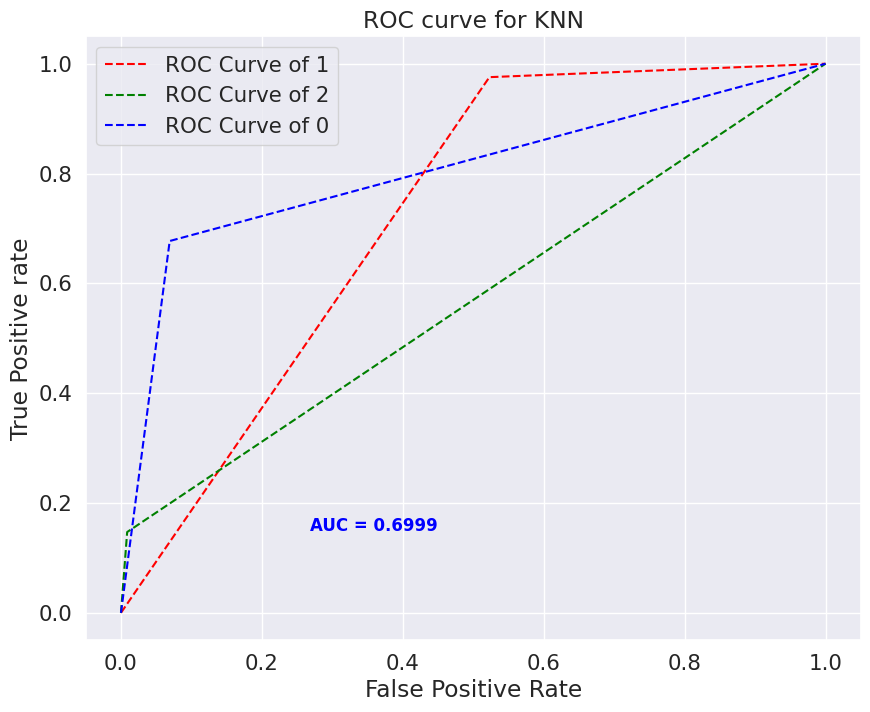

In [144]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_KNN_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='ROC Curve of 1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of 2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of 0')
plt.title('ROC curve for KNN')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc3, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_KNN")
plt.legend(loc='best')

In [145]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
knn.predict(tf_comment)

array([0, 0, 0])

**Support Vector Machine (Model Create,Classification Report,Confusion Matrix,Roc Curve)**

In [146]:
#SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
lsvm=SVC(kernel="linear", probability=True)
lsvm.fit(xtrain,ytrain)
predicted_SVM = lsvm.predict(xtest)
s=accuracy_score(ytest,predicted_SVM)
print(s)


0.8787878787878788


In [147]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_SVM))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       694
           1       0.92      0.78      0.84       680
           2       0.87      0.90      0.88       672

    accuracy                           0.88      2046
   macro avg       0.88      0.88      0.88      2046
weighted avg       0.88      0.88      0.88      2046



In [148]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a3=precision_score(ytest, predicted_SVM,average='micro')
b3=recall_score(ytest, predicted_SVM,average='micro')
c3=f1_score(ytest, predicted_SVM,average='micro')
print("Precision_score",a3)
print("Recall_score",b3)
print("F1_score",c3)

Precision_score 0.8787878787878788
Recall_score 0.8787878787878788
F1_score 0.8787878787878788


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


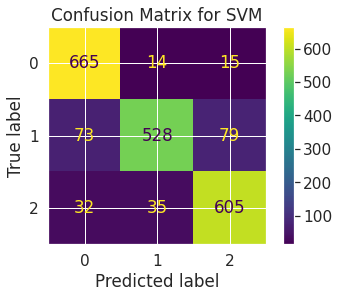

In [149]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lsvm,xtest,ytest)
plt.title("Confusion Matrix for SVM")
plt.savefig("CM_SVM")
plt.show()

In [150]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_SVM_pr = lsvm.predict_proba(xtest)
auc4 = metrics.roc_auc_score(ytest,predicted_SVM_pr,multi_class="ovo", average="macro" )
auc4

0.9707110964883071

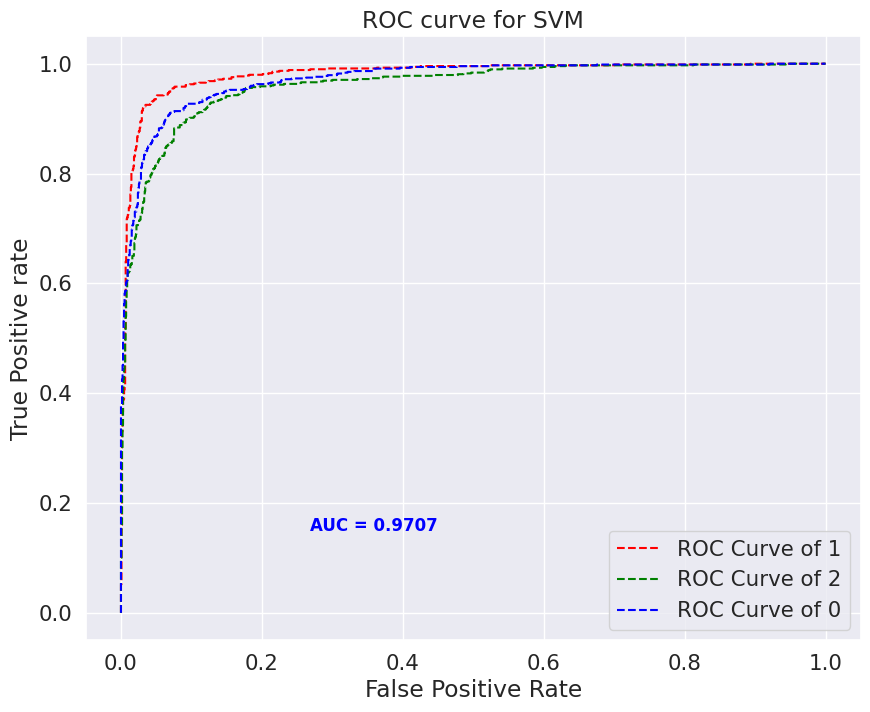

In [151]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_SVM_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='ROC Curve of 1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of 2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of 0')
plt.title('ROC curve for SVM')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc4, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_SVM")
plt.legend(loc='best')

In [152]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
lsvm.predict(tf_comment)


array([1, 2, 0])

In [153]:
#SVM
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
ksvm=SVC(kernel = 'rbf', probability=True)
ksvm.fit(xtrain,ytrain)
predicted_SVMc = ksvm.predict(xtest)
y=accuracy_score(ytest,predicted_SVMc)
print(y)
print("Accuracy: {0:.2%}".format(accuracy_score(predicted_SVMc, ytest)))


# ksvm= SVC(kernel = 'rbf',probability=True)
# ksvm.fit(xtrain, ytrain)
# prediction = ksvm.predict(xtest)
# pred_prob4 = ksvm.predict_proba(xtest)
# print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

0.843108504398827
Accuracy: 84.31%


In [154]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
ksvm.predict(tf_comment)


array([1, 2, 0])

**Decision Tree (Model Create,Classification Report,Confusion Matrix,Roc Curve)**

In [155]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()  
dt.fit(xtrain,ytrain)
predicted_DT = dt.predict(xtest)
t=accuracy_score(ytest,predicted_DT)
print(t)

0.7624633431085044


In [156]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_DT))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       694
           1       0.77      0.71      0.74       680
           2       0.75      0.71      0.73       672

    accuracy                           0.76      2046
   macro avg       0.76      0.76      0.76      2046
weighted avg       0.76      0.76      0.76      2046



In [157]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a4=precision_score(ytest, predicted_DT,average='micro')
b4=recall_score(ytest, predicted_DT,average='micro')
c4=f1_score(ytest, predicted_DT,average='micro')
print("Precision_score",a4)
print("Recall_score",b4)
print("F1_score",c4)

Precision_score 0.7624633431085044
Recall_score 0.7624633431085044
F1_score 0.7624633431085044


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


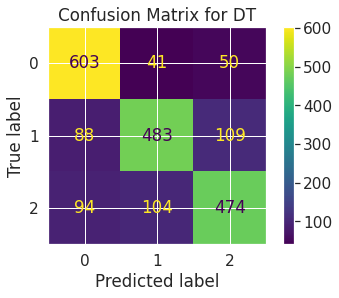

In [158]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt,xtest,ytest)
plt.title("Confusion Matrix for DT")
plt.savefig("CM_DT")
plt.show()

In [159]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_DT_pr = dt.predict_proba(xtest)
auc5 = metrics.roc_auc_score(ytest,predicted_DT_pr,multi_class="ovo", average="macro" )
auc5

0.8362512901113858

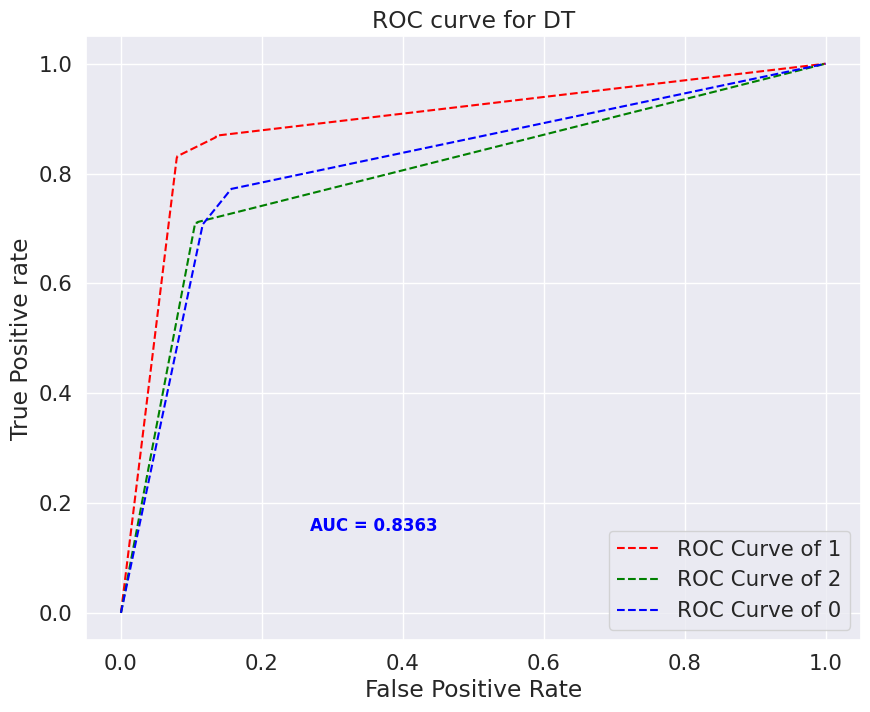

In [160]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_DT_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='ROC Curve of 1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of 2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of 0')
plt.title('ROC curve for DT')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc5, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_DT")
plt.legend(loc='best')

In [161]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
dt.predict(tf_comment)


array([1, 2, 0])

**Random Forest (Model Create,Classification Report,Confusion Matrix,Roc Curve,Sample Test)**

In [162]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators= 100, criterion="entropy",random_state = 0)
rf .fit(xtrain,ytrain)
predicted_RF = rf .predict(xtest)
r=accuracy_score(ytest,predicted_RF)
print(r)


0.8343108504398827


In [163]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_RF))

              precision    recall  f1-score   support

           0       0.80      0.95      0.86       694
           1       0.86      0.77      0.81       680
           2       0.86      0.79      0.82       672

    accuracy                           0.83      2046
   macro avg       0.84      0.83      0.83      2046
weighted avg       0.84      0.83      0.83      2046



In [164]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a5=precision_score(ytest, predicted_RF,average='micro')
b5=recall_score(ytest, predicted_RF,average='micro')
c5=f1_score(ytest, predicted_RF,average='micro')
print("Precision_score",a5)
print("Recall_score",b5)
print("F1_score",c5)

Precision_score 0.8343108504398827
Recall_score 0.8343108504398827
F1_score 0.8343108504398826


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


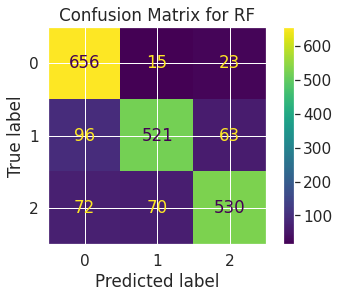

In [165]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,xtest,ytest)
plt.title("Confusion Matrix for RF")
plt.savefig("CM_RF")
plt.show()

In [166]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_RF_pr = rf.predict_proba(xtest)
auc6 = metrics.roc_auc_score(ytest,predicted_RF_pr,multi_class="ovo", average="macro" )
auc6

0.9487049863172935

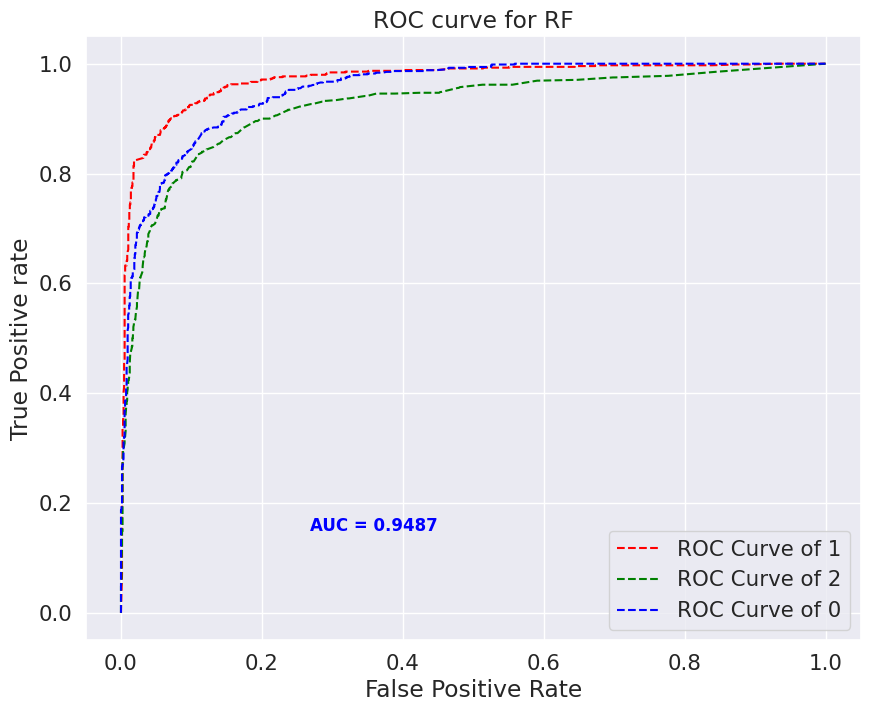

In [167]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_RF_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='ROC Curve of 1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of 2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of 0')
plt.title('ROC curve for RF')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc6, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_RF")
plt.legend(loc='best')

In [168]:
comment=['আবু সাঈদ রানা খুব ভালো কাজ হয়েছে দোস্ত।','কাহিনীর গল্প খুব বাজে','এই সিরিজ টা পুরো কোথায় পাওয়া যাবে']
tf_comment = tfidf1.transform(comment)
rf.predict(tf_comment)


array([1, 2, 0])

**All Model Roc-Curve Performances**

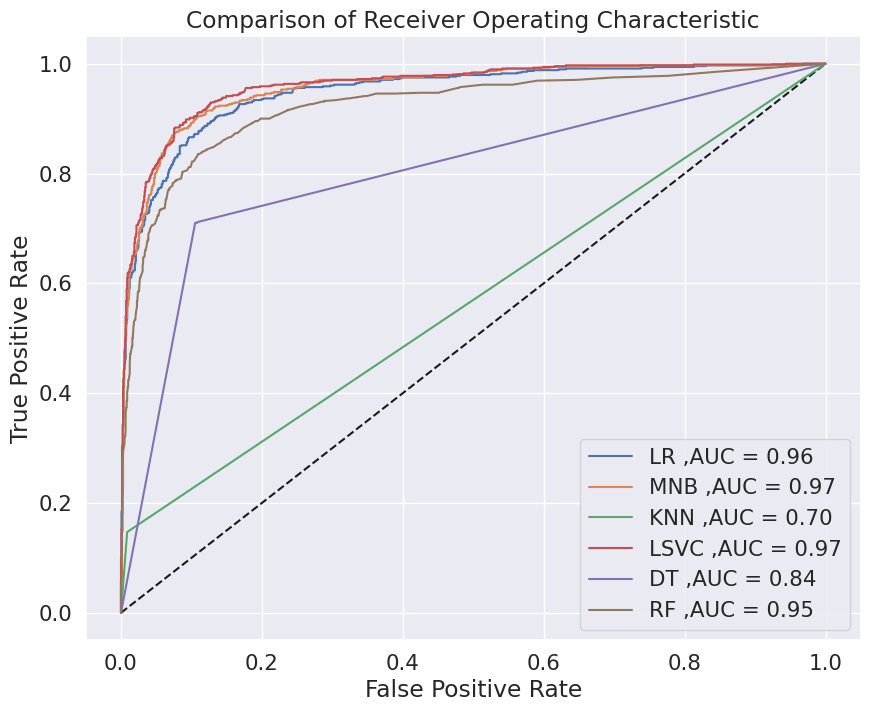

In [169]:
from sklearn import metrics
#ROC Curve
from sklearn.metrics import roc_curve
predicted_LR_pr = lr.predict_proba(xtest)[:,1]
fpr1 , tpr1, thresholds1 =metrics.roc_curve(ytest, predicted_LR_pr,pos_label=1)

predicted_NB_pr = mnb.predict_proba(xtest)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(ytest, predicted_NB_pr,pos_label=1)

predicted_KNN_pr = knn.predict_proba(xtest)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(ytest, predicted_KNN_pr,pos_label=1)

predicted_SVM_pr = lsvm.predict_proba(xtest)[:,1]
fpr4 , tpr4, thresholds4 = metrics.roc_curve(ytest, predicted_SVM_pr,pos_label=1)

predicted_DT_pr = dt.predict_proba(xtest)[:,1]
fpr5 , tpr5, thresholds5 = metrics.roc_curve(ytest, predicted_DT_pr,pos_label=1)

predicted_RF_pr = rf.predict_proba(xtest)[:,1]
fpr6 , tpr6, threshold6 = metrics.roc_curve(ytest, predicted_RF_pr,pos_label=1)

plt.figure(figsize=(10, 8), dpi=100)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LR ,"+'AUC = %0.2f' % auc1)
plt.plot(fpr2, tpr2, label= "MNB ,"+'AUC = %0.2f' % auc2)
plt.plot(fpr3, tpr3, label= "KNN ,"+'AUC = %0.2f' % auc3)
plt.plot(fpr4, tpr4, label= "LSVC ,"+'AUC = %0.2f' % auc4)
plt.plot(fpr5, tpr5, label= "DT ,"+'AUC = %0.2f' % auc5)
plt.plot(fpr6, tpr6, label= "RF ,"+'AUC = %0.2f' % auc6)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Comparison of Receiver Operating Characteristic')
plt.savefig('recallttt.png')
plt.show()



**Comparison**

In [170]:
import pandas as pd
  
# creating and initializing a nested list
datas = [[l, a, b, c, auc1],
            [n, a1, b1, c1, auc2],
            [k, a2, b2, c2, auc3],
            [s, a3, b3, c3, auc4],
            [t, a4, b4, c4, auc5],
            [r, a5, b5, c5, auc6]]
  
# Create a DataFrame object
df = pd.DataFrame(datas,
                  columns=['Accuracy', 'Precision Score', 'Recall Score', 'F1 Score','AUC Score'],
                  index=['LR','MNB', 'KNN', 'SVM', 'DT', 'RF'])

In [171]:
df

,Accuracy,Precision Score,Recall Score,F1 Score,AUC Score
LR,0.864125,0.864125,0.864125,0.864125,0.960369
MNB,0.877810,0.877810,0.877810,0.877810,0.965900
KNN,0.602151,0.602151,0.602151,0.602151,0.699912
SVM,0.878788,0.878788,0.878788,0.878788,0.970711
DT,0.762463,0.762463,0.762463,0.762463,0.836251
RF,0.834311,0.834311,0.834311,0.834311,0.948705


**Testing result for single string**

In [172]:
def predict(text):
    text=clean_text(text)
    text = tfidf1.transform([text])
    y =mnb.predict(text)
    print(y)
    if(y==1):
        print('positive')
    elif(y==2):
        print('negative')
    else:
        print('Neutral')
a="গল্পটা জোশ।আর বাঁধনের ডেডিকেশন সম্পর্কে কিছু বলার নেই।বছরের শুরুটা বাঁধনময় হতে চলেছে"
predict(a)

applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
[1]
positive
